In [1]:
import os
import sys
sys.path.append(os.path.abspath("../../src/"))
sys.path.append(os.path.abspath("../../LHAPDF-files/"))
from tools import PDFs
from LO import F123LO
import matplotlib.pyplot as plt
import numpy as np

In [3]:
theo = F123LO()


LHAPDF 6.2.3 loading all 39 PDFs in set nCTEQ15WZdeut_pcj_p19_1_1
nCTEQ15WZdeut_pcj_p19_1_1, version 1; 39 PDF members
LHAPDF 6.2.3 loading all 59 PDFs in set CT18NLO_1_1
CT18NLO_1_1, version 1; 59 PDF members
LHAPDF 6.2.3 loading all 49 PDFs in set CJ15nlo_1_1
CJ15nlo_1_1, version 2; 49 PDF members
LHAPDF 6.2.3 loading all 101 PDFs in set NNPDF31_nlo_as_0118
NNPDF31_nlo_as_0118, version 1; 101 PDF members
LHAPDF 6.2.3 loading all 65 PDFs in set MSHT20nlo_as118
MSHT20nlo_as118, version 3; 65 PDF members
LHAPDF 6.2.3 loading all 59 PDFs in set CTNLO_nonu
CTNLO_nonu, version 1; 59 PDF members


NameError: name 'theo' is not defined

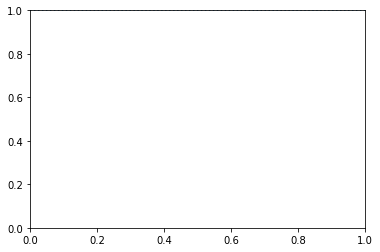

In [4]:
#dimuneu = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
#dimuneu2 = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
#dimuneu3 = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
#dimuneu4 = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
#dimuneu5 = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
#dimuneu6 = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
CTEQ =PDFs("nCTEQ15WZdeut_pcj_p19_1_1", "sym", 56, 26, True)
CT18 =PDFs("CT18NLO_1_1", "sym", 56, 26, True)
CJ15  = PDFs ("CJ15nlo_1_1", "sym", 56, 26, True)
NNPDF31  = PDFs ("NNPDF31_nlo_as_0118", "MCreplica", 56, 26, True)
MSHT20= PDFs ("MSHT20nlo_as118", "sym", 56, 26, True)
CT18nonua= PDFs ("CTNLO_nonu", "sym", 56, 26, True)


errorF = False
mypdfs = [ [CTEQ, "black", "-", "CTEQ6",  errorF , 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
           [CT18, "blue", "-", "CT18",  errorF , 0.2], 
           [CJ15, "green", "-", "CJ15",  errorF , 0.2], 
           [NNPDF31, "cyan", "-", "NNPDF31", errorF , 0.2], 
           [MSHT20, "yellow", "-", "MSHT20", errorF , 0.2], 
           [CT18nonua, "red", "-", "CT18nonua", errorF, 0.2], 

]

Q = 2.24
#xlist = np.linspace(0.001, 1.0,500)
xlist = np.logspace(-3,np.log10(0.85),300)
plt.figure(1,figsize=(6,4)) 
plt.tight_layout()
plt.axhline(1.0, linestyle="dotted")
data_base = []
for x in xlist : 
    d, e = theo.F2(x, Q,"W+", CTEQ)
    data_base.append(d)
data_base = np.array(data_base)

for i, pdf in zip(range(len(mypdfs)), mypdfs) : 
    data = []
    dp = []
    for x in xlist : 
        d, e = theo.F2(x, Q,"W+", pdf[0])
        data.append(d)
        dp.append(e)
    data= np.array(data)
    dp = np.array(dp)

    plt.plot(xlist, data/data_base, color=pdf[1], lineStyle=pdf[2], label = pdf[3])

    if (pdf[4]) : 
        plt.fill_between(xlist, (data+dp)/data_base, (data-dp)/data_base, color=pdf[1], alpha=pdf[5])


    plt.xscale("logit" ,one_half="0.5")
    plt.xlabel('$x$',fontsize=15)
    plt.ylabel(r'$F_2^{\nu}/F_{2, CTEQ}^\nu$      ',fontsize=20, rotation=90)
    plt.ylim(0.7, 1.3)


    plt.legend()
    plt.annotate("$Q={}\ \mathrm{{GeV}}$".format(Q), xy=(0.3, 0.15), xycoords='axes fraction', fontsize=15)
    #ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
    
plt.savefig("F2.pdf", bbox_inches="tight")

In [5]:
for i in a : 
    print (round(i-0.465, 3), end=" ")

NameError: name 'a' is not defined

Text(0, 0.5, '$F_{2, NC}^{TMC}/F_{2, NC}^{0}$')

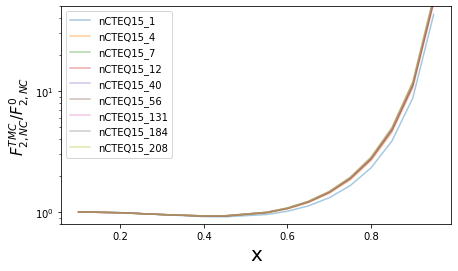

In [11]:
plt.figure(figsize=[7, 4])
x= [0.1, 0.2, 0.3, 0.4, 0.45, 0.55, 0.60, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
Q=1.30001

nCTEQ15_F2 = {1 : [1.00398, 0.990383, 0.951514, 0.916565, 0.913086, 0.954578, 1.01539, 1.12409, 1.31327, 1.65298, 2.31826, 3.8594, 8.74586, 42.8988],
4: [1.0028, 0.987846, 0.953639, 0.925777, 0.925658, 0.983126, 1.06047, 1.19505, 1.42654, 1.84108, 2.6551, 4.55274, 10.5739, 52.2523],
7: [1.00265, 0.98748, 0.954057, 0.927237, 0.927554, 0.987654, 1.06814, 1.20815, 1.44944, 1.88308, 2.73894, 4.74725, 11.1584, 55.7747],
12: [1.00267, 0.987332, 0.953916, 0.927872, 0.928961, 0.989864, 1.07007, 1.20916, 1.44841, 1.87746, 2.72211, 4.69706, 10.9706, 54.2358],
40: [1.00264, 0.986942, 0.954107, 0.929431, 0.931299, 0.994122, 1.07574, 1.217, 1.45988, 1.89579, 2.75501, 4.76742, 11.1651, 55.2],
56: [1.00264, 0.986836, 0.954223, 0.929727, 0.931545, 0.9948, 1.07722, 1.21996, 1.46573, 1.90756, 2.78056, 4.83177, 11.3764, 56.6271],
131: [1.00285, 0.986573, 0.954089, 0.929967, 0.93183, 0.995898, 1.07957, 1.22462, 1.4748, 1.9259, 2.82079, 4.93494, 11.7245, 59.0465],
184: [1.00307, 0.986414, 0.953819, 0.929938, 0.931934, 0.996442, 1.08052, 1.22622, 1.47754, 1.93092, 2.8311, 4.96017, 11.8076, 59.6121],
208: [1.00317, 0.986336, 0.953707, 0.929936, 0.93197, 0.996691, 1.08099, 1.22709, 1.47916, 1.93403, 2.83764, 4.97654, 11.8623, 59.9972],}
A=list(nCTEQ15_F2.keys())

for a in A : 
    plt.plot(x, nCTEQ15_F2 [a], label="nCTEQ15_"+str(a), alpha=0.4, linestyle="-")

#ratio = [1.-4.*0.938**2*myx**2/(Q**2) for myx in x]
#plt.plot(x, ratio, label="Theory", color="black")



EPPS_F2 = {1: [1.00382, 0.990463, 0.952463, 0.916428, 0.910601, 0.950654, 1.01368, 1.12609, 1.32108, 1.67118, 2.35804, 3.95542, 9.10866, 45.7889],
4:  [1.00253, 0.988263, 0.954322, 0.926295, 0.925087, 0.979334, 1.05042, 1.17868, 1.3912, 1.76759, 2.46394, 3.76322, 7.4878, 32.0849],
12: [1.00243, 0.987962, 0.954321, 0.927829, 0.927664, 0.983985, 1.05618, 1.18487, 1.39701, 1.77228, 2.46792, 3.76825, 7.50131, 32.2439],
27: [1.00234, 0.987686, 0.954407, 0.929254, 0.929983, 0.988512, 1.06174, 1.1914, 1.40446, 1.78073, 2.47847, 3.78173, 7.52687, 32.3732],
40: [1.00233, 0.987346, 0.954522, 0.929537, 0.930501, 0.989447, 1.06266, 1.1919, 1.40388, 1.7781, 2.47273, 3.77158, 7.50487, 32.2902],
56: [1.00224, 0.987456, 0.954643, 0.930515, 0.93204, 0.992761, 1.06713, 1.19749, 1.41117, 1.78826, 2.48844, 3.79652, 7.55954, 32.5754],
64: [1.0022, 0.98737, 0.95467, 0.9309, 0.932624, 0.993898, 1.06869, 1.1996, 1.41383, 1.79178, 2.4939, 3.80325, 7.56979, 32.5651],
108:[1.00211, 0.987002, 0.954874, 0.931835, 0.934253, 0.997162, 1.07292, 1.20468, 1.4199, 1.79921, 2.50397, 3.81879, 7.60509, 32.794],
119:[1.0021, 0.987134, 0.954828, 0.932268, 0.934831, 0.99845, 1.07465, 1.20702, 1.42304, 1.80364, 2.51085, 3.82997, 7.63054, 32.9364],
197:[1.00202, 0.986779, 0.955017, 0.933188, 0.936456, 1.00177, 1.07916, 1.21237, 1.42929, 1.81135, 2.52216, 3.84714, 7.66747, 33.1276],
208:[1.00199, 0.986846, 0.954999, 0.93341, 0.936762, 1.00229, 1.08008, 1.21356, 1.43089, 1.81367, 2.52571, 3.85276, 7.67962, 33.192],
}

A=list(EPPS_F2.keys())
for a in A : 
    pass#plt.plot(x, EPPS_F2[a], label="EPPS16_"+str(a), linestyle="-",)


plt.ylim(0.8, 50)
plt.yscale("log")
#plt.grid("both")
plt.legend()
plt.xlabel("x", fontsize=20)
plt.ylabel(r"$F_{2, NC}^{TMC}/F_{2, NC}^{0}$", fontsize=15)


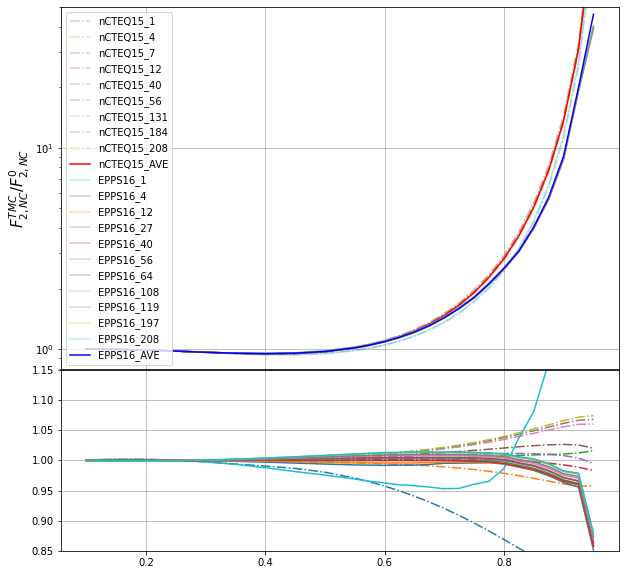

In [33]:
fig, axs = plt.subplots(2, sharex=True, sharey=False, figsize=[10,10], gridspec_kw={'height_ratios': [2, 1]})


x= [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.575, 0.60, 0.625, 
                0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95]
Q=1.5

nCTEQ15_F2 = {1: [1.00244, 0.999881, 0.991639, 0.978447, 0.962687, 0.948061, 0.93887, 0.9391, 0.952418, 0.985, 1.01162, 1.04768, 1.09574, 1.15905, 1.24302, 1.35471, 1.50561, 1.71353, 2.00868, 2.44408, 3.12543, 4.26948, 6.40785, 11.1596, 25.2604, 102.28],
4: [1.0016, 0.998152, 0.990062, 0.978221, 0.96479, 0.952852, 0.946255, 0.949446, 0.968249, 1.01042, 1.0437, 1.08802, 1.14638, 1.22264, 1.32312, 1.45645, 1.63591, 1.88356, 2.23446, 2.75288, 3.56597, 4.92854, 7.47146, 13.112, 29.7262, 118.787],
7: [1.00162, 0.997892, 0.989838, 0.978227, 0.965172, 0.953635, 0.947386, 0.950998, 0.970669, 1.01454, 1.04911, 1.0951, 1.15564, 1.2348, 1.33918, 1.47788, 1.6648, 1.92336, 2.29039, 2.83403, 3.68926, 5.12566, 7.81276, 13.7894, 31.4274, 126.062],
12: [1.0015, 0.997857, 0.989724, 0.978085, 0.965111, 0.953809, 0.94798, 0.952162, 0.971497, 1.01604, 1.05044, 1.09615, 1.15625, 1.2348, 1.33825, 1.47564, 1.66062, 1.91624, 2.27867, 2.81477, 3.65672, 5.06811, 7.70229, 13.5423, 30.6984, 121.953],
40: [1.00146, 0.997645, 0.989461, 0.97798, 0.965384, 0.954571, 0.949336, 0.954133, 0.974871, 1.01959, 1.05455, 1.10093, 1.16186, 1.24148, 1.34632, 1.4856, 1.67316, 1.93255, 2.30045, 2.84504, 3.70093, 5.13607, 7.81488, 13.7525, 31.1694, 123.397],
56: [1.00144, 0.997568, 0.989394, 0.977993, 0.965525, 0.954803, 0.949604, 0.954389, 0.975262, 1.0204, 1.0557, 1.10253, 1.1641, 1.24456, 1.35059, 1.49153, 1.68145, 1.94439, 2.31767, 2.87091, 3.74168, 5.20375, 7.93701, 14.0064, 31.8444, 126.542],
131: [1.00147, 0.997465, 0.989233, 0.97792, 0.965637, 0.955137, 0.950052, 0.954924, 0.976079, 1.02189, 1.05772, 1.10527, 1.16778, 1.24954, 1.35733, 1.50078, 1.69428, 1.96258, 2.34407, 2.91059, 3.80432, 5.3082, 8.12661, 14.4035, 32.9081, 131.52], 
184: [1.00152, 0.997439, 0.989152, 0.977822, 0.965601, 0.955186, 0.950196, 0.95515, 0.976436, 1.02245, 1.05842, 1.10614, 1.16888, 1.25092, 1.35909, 1.50293, 1.69733, 1.96674, 2.34991, 2.91913, 3.81749, 5.32977, 8.1652, 14.4832, 33.118, 132.474],
208: [1.00155, 0.997446, 0.989117, 0.977786, 0.965593, 0.955206, 0.950244, 0.955221, 0.976553, 1.02267, 1.05873, 1.10655, 1.16943, 1.25167, 1.36011, 1.50446, 1.69923, 1.96943, 2.3538, 2.92497, 3.82668, 5.34519, 8.19336, 14.5427, 33.2799, 133.255,],
}
A=list(nCTEQ15_F2.keys())

for a in A : 
    axs[0].plot(x, nCTEQ15_F2 [a], label="nCTEQ15_"+str(a), alpha=0.3, linestyle="dashdot")

axs[0].plot(x, getAverage(nCTEQ15_F2), label="nCTEQ15_AVE",color="red",linestyle="-" )

#ratio = [1.-4.*0.938**2*myx**2/(Q**2) for myx in x]
#plt.plot(x, ratio, label="Theory", color="black")



EPPS_F2 = {1: [1.00237, 0.999718, 0.991625, 0.97867, 0.963252, 0.948691, 0.938772, 0.93771, 0.950619, 0.984327, 1.01206, 1.04953, 1.09906, 1.16448, 1.25081, 1.36566, 1.52058, 1.73417, 2.03748, 2.48629, 3.18857, 4.37589, 6.61782, 11.6383, 26.6518, 108.267],
4: [1.00147, 0.998235, 0.99031, 0.978491, 0.96511, 0.953523, 0.947606, 0.951183, 0.968389, 1.00807, 1.0401, 1.08136, 1.13643, 1.2058, 1.3001, 1.42625, 1.58737, 1.79773, 2.10228, 2.50566, 3.03995, 3.97959, 5.54765, 8.77876, 19.1347, 39.2525],
12: [1.00139, 0.99805, 0.990107, 0.978377, 0.965225, 0.954296, 0.948983, 0.953414, 0.971308, 1.01173, 1.0441, 1.08564, 1.1407, 1.21015, 1.3039, 1.42915, 1.58991, 1.79967, 2.10339, 2.50667, 3.042, 3.98437, 5.55685, 8.79723, 19.2072, 39.4849],
27: [1.00131, 0.998267, 0.989917, 0.978326, 0.965355, 0.954973, 0.95027, 0.955399, 0.974092, 1.01531, 1.04797, 1.08989, 1.14526, 1.21522, 1.309, 1.43415, 1.59532, 1.80516, 2.1091, 2.51325, 3.04955, 3.99469, 5.5713, 8.81773, 19.2578, 39.6165],
40: [1.00131, 0.997906, 0.989711, 0.978177, 0.965567, 0.95504, 0.950544, 0.955844, 0.974679, 1.01596, 1.04855, 1.09038, 1.14553, 1.21523, 1.30846, 1.43276, 1.59313, 1.80213, 2.10477, 2.50746, 3.04267, 3.98548, 5.55875, 8.80073, 19.2243, 39.544], 
56: [1.00124, 0.997753, 0.989758, 0.978141, 0.965716, 0.955542, 0.951403, 0.957169, 0.976652, 1.01873, 1.05173, 1.09399, 1.14951, 1.21979, 1.3135, 1.43852, 1.60014, 1.81025, 2.11466, 2.52009, 3.05818, 4.00776, 5.59108, 8.84864, 19.3448, 39.859], 
64: [1.00121, 0.997694, 0.989701, 0.978159, 0.965737, 0.955691, 0.951765, 0.957642, 0.977335, 1.01968, 1.05283, 1.09529, 1.15101, 1.22155, 1.31539, 1.44051, 1.60245, 1.81293, 2.11796, 2.52411, 3.0624, 4.01278, 5.59689, 8.85325, 19.336, 39.8023],
108: [1.00114, 0.997617, 0.989477, 0.97808, 0.966003, 0.956167, 0.952592, 0.959103, 0.979345, 1.02232, 1.05579, 1.0986, 1.15458, 1.22554, 1.31954, 1.44481, 1.60736, 1.81816, 2.12379, 2.53134, 3.07162, 4.02657, 5.61783, 8.88666, 19.4338, 40.082], 
119: [1.00113, 0.997566, 0.989559, 0.978073, 0.965976, 0.956315, 0.953005, 0.959526, 0.980074, 1.02341, 1.05702, 1.10003, 1.15624, 1.22752, 1.32177, 1.44732, 1.61039, 1.82165, 2.12807, 2.53688, 3.07856, 4.03692, 5.63321, 8.91, 19.495, 40.2463],
197: [1.00109, 0.997464, 0.989333, 0.978023, 0.966215, 0.956785, 0.953825, 0.96099, 0.982096, 1.02615, 1.06019, 1.10359, 1.16, 1.23163, 1.32599, 1.45167, 1.61547, 1.82736, 2.1348, 2.54536, 3.08899, 4.0521, 5.65537, 8.94246, 19.5751, 40.4542],
208: [1.00107, 0.997434, 0.989371, 0.978032, 0.966183, 0.956882, 0.954027, 0.961227, 0.982401, 1.02664, 1.06086, 1.10439, 1.16086, 1.23258, 1.32706, 1.45297, 1.61711, 1.82926, 2.13708, 2.54823, 3.09242, 4.0569, 5.66222, 8.9526, 19.6014, 40.524],
}

A=list(EPPS_F2.keys())
for a in A : 
    axs[0].plot(x, EPPS_F2[a], label="EPPS16_"+str(a),alpha=0.3, linestyle="-",)

axs[0].plot(x, getAverage(EPPS_F2), label="EPPS16_AVE", color="blue", linestyle="-" )


axs[0].set_ylim(0.8, 50)
axs[0].set_yscale("log")
axs[0].grid("both")
axs[0].legend()
axs[0].set_xlabel("x", fontsize=20)
axs[0].set_ylabel(r"$F_{2, NC}^{TMC}/F_{2, NC}^{0}$", fontsize=15)

#####################################
ave_ncteq = getAverage(nCTEQ15_F2)
ave_epps = getAverage(EPPS_F2)

A=list(nCTEQ15_F2.keys())
for a in A : 
    axs[1].plot(x, nCTEQ15_F2[a]/ave_ncteq,  alpha=0.99, linestyle="dashdot")

A=list(EPPS_F2.keys())
for a in A : 
    axs[1].plot(x, EPPS_F2[a]/ave_epps,alpha=0.99, linestyle="-",)

axs[1].set_ylim(0.85, 1.15)
axs[1].grid("both")

plt.subplots_adjust(hspace=0.005, wspace = 0.00)






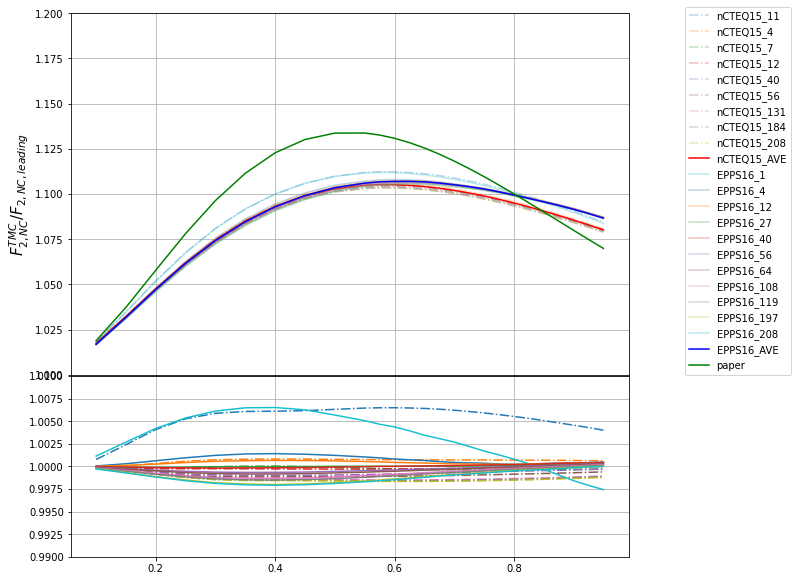

In [48]:
fig, axs = plt.subplots(2, sharex=True, sharey=False, figsize=[10,10], gridspec_kw={'height_ratios': [2, 1]})


xlist= [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.575, 0.60, 0.625, 
                0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95]
Q=1.5

nCTEQ15_F2 = {11: [1.01824, 1.03482, 1.05196, 1.06767, 1.08099, 1.09168, 1.09985, 1.10582, 1.1098, 1.11191, 1.11232, 1.11232, 1.11193, 1.11122, 1.11017, 1.10884, 1.10723, 1.1054, 1.10333, 1.10108, 1.09866, 1.09607, 1.09334, 1.09049, 1.08753, 1.08448],
4: [1.01731, 1.03238, 1.04802, 1.06268, 1.07546, 1.08595, 1.09407, 1.09993, 1.1037, 1.10562, 1.10597, 1.10596, 1.1056, 1.10494, 1.10398, 1.10278, 1.10133, 1.09968, 1.09782, 1.09579, 1.09361, 1.09128, 1.08883, 1.08625, 1.08357, 1.08082],
7: [1.01722, 1.03206, 1.04746, 1.06194, 1.07464, 1.08511, 1.09321, 1.09902, 1.10272, 1.10456, 1.10488, 1.10484, 1.10445, 1.10377, 1.1028, 1.10158, 1.10013, 1.09848, 1.09663, 1.09462, 1.09246, 1.09015, 1.08773, 1.08519, 1.08255, 1.07984],
12: [1.01727, 1.03208, 1.04741, 1.0618, 1.0744, 1.0848, 1.09287, 1.09872, 1.10251, 1.10445, 1.10483, 1.10483, 1.10449, 1.10385, 1.10292, 1.10174, 1.10032, 1.09869, 1.09686, 1.09487, 1.09272, 1.09043, 1.08802, 1.08548, 1.08284, 1.08013],
40: [1.01731, 1.03192, 1.04701, 1.0612, 1.07367, 1.08401, 1.09209, 1.09796, 1.10179, 1.10379, 1.10419, 1.10422, 1.1039, 1.10328, 1.10237, 1.10121, 1.09981, 1.09821, 1.0964, 1.09443, 1.0923, 1.09003, 1.08763, 1.08512, 1.0825, 1.07981],
56: [1.01732, 1.03186, 1.04688, 1.06103, 1.07348, 1.08383, 1.09191, 1.09778, 1.10159, 1.10354, 1.10393, 1.10394, 1.1036, 1.10297, 1.10206, 1.10088, 1.09948, 1.09787, 1.09606, 1.09408, 1.09195, 1.08968, 1.08729, 1.08478, 1.08217, 1.07949],
131: [1.01741, 1.03189, 1.04676, 1.06079, 1.07319, 1.08352, 1.0916, 1.09746, 1.10123, 1.10314, 1.1035, 1.10349, 1.10314, 1.10249, 1.10156, 1.10038, 1.09896, 1.09735, 1.09553, 1.09355, 1.09142, 1.08915, 1.08677, 1.08427, 1.08167, 1.079],
184: [1.01749, 1.03197, 1.04679, 1.06077, 1.07312, 1.08343, 1.0915, 1.09735, 1.10111, 1.10302, 1.10338, 1.10337, 1.10302, 1.10237, 1.10144, 1.10026, 1.09884, 1.09723, 1.09542, 1.09344, 1.09131, 1.08904, 1.08666, 1.08416, 1.08157, 1.0789],
208: [1.01752, 1.03201, 1.04681, 1.06076, 1.07309, 1.08339, 1.09145, 1.0973, 1.10106, 1.10296, 1.10332, 1.10331, 1.10295, 1.1023, 1.10137, 1.10019, 1.09877, 1.09715, 1.09534, 1.09336, 1.09123, 1.08897, 1.08659, 1.08409, 1.08149, 1.07883],
}
A=list(nCTEQ15_F2.keys())

for a in A : 
    axs[0].plot(xlist, nCTEQ15_F2 [a], label="nCTEQ15_"+str(a), alpha=0.3, linestyle="dashdot")

axs[0].plot(xlist, getAverage(nCTEQ15_F2), label="nCTEQ15_AVE",linestyle="-" , color="red")

#ratio = [1.-4.*0.938**2*myx**2/(Q**2) for myx in x]
#plt.plot(x, ratio, label="Theory", color="black")



EPPS_F2 = {1: [1.018, 1.03451, 1.05159, 1.06733, 1.08081, 1.09171, 1.10005, 1.10599, 1.10975, 1.1116, 1.11189, 1.11177, 1.11132, 1.11054, 1.10945, 1.10808, 1.10646, 1.10461, 1.10255, 1.1003, 1.09788, 1.09531, 1.0926, 1.08977, 1.08683, 1.08379],
4: [1.01689, 1.03204, 1.04784, 1.06265, 1.07554, 1.08617, 1.09447, 1.10059, 1.10483, 1.10715, 1.10777, 1.10784, 1.10777, 1.10744, 1.10663, 1.10559, 1.10445, 1.10312, 1.10145, 1.09967, 1.09785, 1.09599, 1.09404, 1.09192, 1.08957, 1.08708],
12: [1.01685, 1.03186, 1.04745, 1.06209, 1.07484, 1.08536, 1.09365, 1.09982, 1.10416, 1.10659, 1.10727, 1.10742, 1.10741, 1.10713, 1.1064, 1.10541, 1.10431, 1.10301, 1.1014, 1.09965, 1.09783, 1.09596, 1.09401, 1.09189, 1.08954, 1.08705],
27: [1.01679, 1.03163, 1.04708, 1.06153, 1.07419, 1.08462, 1.09289, 1.09909, 1.10349, 1.10601, 1.10674, 1.10694, 1.10698, 1.10675, 1.10607, 1.10513, 1.10407, 1.1028, 1.10123, 1.09952, 1.09771, 1.09585, 1.0939, 1.09181, 1.08947, 1.08699],
40: [1.01681, 1.03166, 1.04705, 1.06146, 1.07403, 1.08449, 1.09276, 1.09897, 1.1034, 1.10596, 1.10672, 1.10694, 1.107, 1.10678, 1.10612, 1.1052, 1.10415, 1.1029, 1.10134, 1.09962, 1.09781, 1.09594, 1.09399, 1.09189, 1.08954, 1.08705],
56: [1.01674, 1.03148, 1.04675, 1.06106, 1.07355, 1.08396, 1.09221, 1.09842, 1.10287, 1.10547, 1.10625, 1.1065, 1.10658, 1.1064, 1.10577, 1.10487, 1.10384, 1.10261, 1.10108, 1.09938, 1.09759, 1.09573, 1.09379, 1.09171, 1.08938, 1.0869],
64: [1.01671, 1.03141, 1.04666, 1.06091, 1.07339, 1.08377, 1.09201, 1.09823, 1.10269, 1.10529, 1.10608, 1.10634, 1.10643, 1.10626, 1.10564, 1.10476, 1.10374, 1.10252, 1.101, 1.09932, 1.09752, 1.09566, 1.09373, 1.09166, 1.08934, 1.08686],
108: [1.01666, 1.03126, 1.04638, 1.06053, 1.0729, 1.08326, 1.09148, 1.0977, 1.1022, 1.10486, 1.10568, 1.10597, 1.10609, 1.10595, 1.10537, 1.10451, 1.10352, 1.10232, 1.10083, 1.09917, 1.09739, 1.09554, 1.09362, 1.09156, 1.08925, 1.08677],
119: [1.01663, 1.03118, 1.04627, 1.06041, 1.07275, 1.08306, 1.09127, 1.0975, 1.10199, 1.10466, 1.10549, 1.10579, 1.10592, 1.10578, 1.10522, 1.10437, 1.10338, 1.10219, 1.10072, 1.09907, 1.09729, 1.09544, 1.09353, 1.09149, 1.08918, 1.0867],
197: [1.01658, 1.03104, 1.046, 1.06004, 1.07228, 1.08256, 1.09074, 1.09697, 1.10149, 1.10421, 1.10506, 1.1054, 1.10556, 1.10546, 1.10494, 1.10412, 1.10316, 1.10199, 1.10055, 1.09891, 1.09715, 1.0953, 1.0934, 1.09137, 1.08907, 1.0866],
208: [1.01656, 1.03099, 1.04596, 1.05995, 1.07221, 1.08246, 1.09064, 1.09688, 1.1014, 1.10411, 1.10497, 1.10531, 1.10547, 1.10538, 1.10486, 1.10406, 1.10309, 1.10192, 1.10049, 1.09886, 1.09709, 1.09525, 1.09335, 1.09133, 1.08904, 1.08657],
}

A=list(EPPS_F2.keys())
for a in A : 
    axs[0].plot(xlist, EPPS_F2[a], label="EPPS16_"+str(a),alpha=0.3, linestyle="-",)

axs[0].plot(xlist, getAverage(EPPS_F2), label="EPPS16_AVE",linestyle="-", color="blue" )



Q=1.5
M=0.938
myx= [0.01*i for i in range(10, 100)]

y=[]
for x in xlist : 
    mu =(M/Q)**2
    r=np.sqrt(1+(2.*x*M/Q)**2)
    xi = 2*x/(1+r)
    a= (1.-xi)**2*6.*mu*x*xi/r#(1.-xi)*6.*mu*x*xi/r + (-np.log(xi)-1.+xi)*12.*(mu*x*xi/r)**2
    y.append(1.+a)
axs[0].plot(xlist, y, label="paper", color="green")


axs[0].set_ylim(1., 1.2)
#axs[0].set_yscale("log")
axs[0].grid("both")
axs[0].legend(loc=[1.1,0])
axs[0].set_xlabel("x", fontsize=20)
axs[0].set_ylabel(r"$F_{2, NC}^{TMC}/F_{2, NC, leading}$", fontsize=15)

#####################################
ave_ncteq = getAverage(nCTEQ15_F2)
ave_epps = getAverage(EPPS_F2)

A=list(nCTEQ15_F2.keys())
for a in A : 
    axs[1].plot(xlist, nCTEQ15_F2[a]/ave_ncteq,  alpha=0.99, linestyle="dashdot")

A=list(EPPS_F2.keys())
for a in A : 
    axs[1].plot(xlist, EPPS_F2[a]/ave_epps,alpha=0.99, linestyle="-",)

axs[1].set_ylim(0.99, 1.01)
axs[1].grid("both")

plt.subplots_adjust(hspace=0.005, wspace = 0.00)

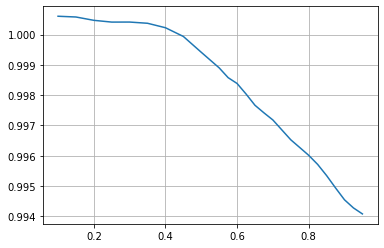

In [36]:
plt.plot(x,ave_ncteq/ave_epps )
plt.grid("both")

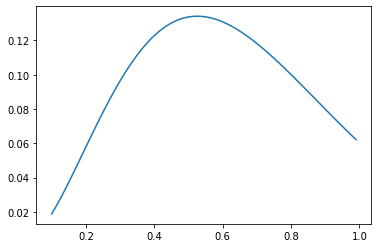

In [41]:
Q=1.5
M=0.938
myx= [0.01*i for i in range(10, 100)]

y=[]
for x in myx : 
    mu =(M/Q)**2
    r=np.sqrt(1+(2.*x*M/Q)**2)
    xi = 2*x/(1+r)
    a= (1.-xi)**2*6.*mu*x*xi/r#(1.-xi)*6.*mu*x*xi/r + (-np.log(xi)-1.+xi)*12.*(mu*x*xi/r)**2
    y.append(a)


plt.plot(myx, y)

In [2]:
def getAverage(dt) : 
    arr=[]
    for k, i in dt.items(): 
        arr.append(i)

    arr= np.array(arr)
    vec= []
    Ncol= arr.shape[1]
    for i in range(Ncol) : 
        vec.append(np.average(arr[:,i]))
    return np.array(vec)


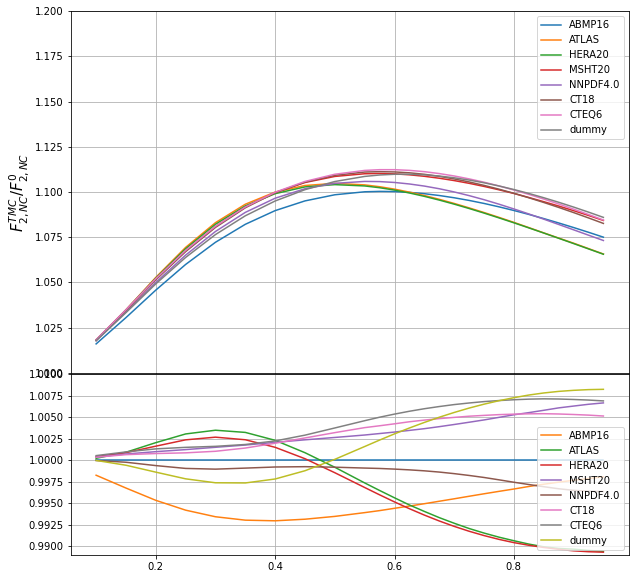

In [3]:
fig, axs = plt.subplots(2, sharex=True, sharey=False, figsize=[10,10], gridspec_kw={'height_ratios': [2, 1]})


x= [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.575, 0.60, 0.625, 
                0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95]
Q=1.5

ABMP16 = {1: [1.01593, 1.03048, 1.04569, 1.05989, 1.07216, 1.0821, 1.08967, 1.09505, 1.09844, 1.10009, 1.10031, 1.10021, 1.09976, 1.09903, 1.09803, 1.09678, 1.09531, 1.09364, 1.09177, 1.08974, 1.08758, 1.08527, 1.08285, 1.08032, 1.07769, 1.07498]}
ATLAS = {1: [1.01793, 1.03478, 1.05273, 1.06933, 1.08301, 1.09321, 1.09993, 1.10357, 1.10475, 1.10391, 1.1029, 1.10156, 1.0999, 1.09804, 1.09593, 1.09365, 1.09119, 1.08863, 1.08594, 1.08317, 1.08028, 1.07736, 1.07449, 1.07166, 1.06866, 1.06566]}
HERA20 = {1: [1.01813, 1.03473, 1.0523, 1.0686, 1.08214, 1.09228, 1.09904, 1.1028, 1.10405, 1.10332, 1.10234, 1.10103, 1.09942, 1.09757, 1.0955, 1.09325, 1.09084, 1.08831, 1.08566, 1.08293, 1.08013, 1.07728, 1.07438, 1.07145, 1.0685, 1.06555]}
MSHT20 = {1: [1.01808, 1.03457, 1.05163, 1.06739, 1.08087, 1.09161, 1.09967, 1.10522, 1.10858, 1.11007, 1.11022, 1.11001, 1.10948, 1.10866, 1.10759, 1.10629, 1.10477, 1.10306, 1.10119, 1.09917, 1.09694, 1.09462, 1.09222, 1.08966, 1.087, 1.08423]}
NNPDF40 = {1: [1.01767, 1.03358, 1.04993, 1.06506, 1.07813, 1.08869, 1.09653, 1.10178, 1.10476, 1.10582, 1.10573, 1.10525, 1.10441, 1.10325, 1.10177, 1.1, 1.09797, 1.09572, 1.09324, 1.0906, 1.08783, 1.08496, 1.08202, 1.07906, 1.07609, 1.07314]}
CT18 = {1: [1.01806, 1.03449, 1.0514, 1.06699, 1.08037, 1.09123, 1.09956, 1.10546, 1.1092, 1.11102, 1.11122, 1.11107, 1.11059, 1.10976, 1.10862, 1.1072, 1.10554, 1.10364, 1.10154, 1.09925, 1.09679, 1.09419, 1.09145, 1.0886, 1.08564, 1.08259]}
CTEQ6M = {1: [1.01825, 1.03482, 1.05197, 1.06767, 1.08099, 1.09168, 1.09985, 1.10582, 1.1098, 1.11191, 1.11232, 1.11232, 1.11194, 1.11122, 1.11017, 1.10884, 1.10723, 1.1054, 1.10333, 1.10108, 1.09865, 1.09607, 1.09334, 1.09049, 1.08753, 1.08448]}
DUMMY= {1: [1.01768, 1.03322, 1.04913, 1.06377, 1.07642, 1.08681, 1.095, 1.10126, 1.10577, 1.10859, 1.10938, 1.10978, 1.10979, 1.10946, 1.1088, 1.10783, 1.10658, 1.10507, 1.10331, 1.10134, 1.09917, 1.09681, 1.0943, 1.09164, 1.08884, 1.08593],}

l = [ABMP16, ATLAS, HERA20, MSHT20, NNPDF40, CT18, CTEQ6M, DUMMY]
lpdfs =[[ABMP16, "ABMP16"], [ATLAS, "ATLAS"], [HERA20, "HERA20"], [MSHT20, "MSHT20"], [NNPDF40, "NNPDF4.0"], [CT18, "CT18"], [CTEQ6M, "CTEQ6"], [DUMMY, "dummy"]]

def average(mt) : 
    ta = []
    for myp in mt : 
        ta.append(myp[1])
    ta= np.array(ta)
    col = ta.shape[1]
    av = []
    for i in range(col) : 
        av.append(np.average(ta[:, i]))

    return np.array(av)

for a in lpdfs : 
    axs[0].plot(x, a[0][1], label=a[1], alpha=0.99, linestyle="-")



axs[0].set_ylim(1., 1.2)
#axs[0].set_yscale("log")
axs[0].grid("both")
axs[0].legend()
axs[0].set_xlabel("x", fontsize=20)
axs[0].set_ylabel(r"$F_{2, NC}^{TMC}/F_{2, NC}^{0}$", fontsize=15)

#####################################
ave = average(l)
plt.plot(x, ave/ave)

for a in lpdfs : 
    axs[1].plot(x, a[0][1]/ave, label=a[1], alpha=0.99, linestyle="-")

axs[1].set_ylim(0.989, 1.01)
axs[1].grid("both")
axs[1].legend()

plt.subplots_adjust(hspace=0.005, wspace = 0.00)




